In [91]:
# import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt
git_url = 'https://github.com/knnthfrmn/dsc25_group.git'

In [92]:
# load all data

unemployment_data = pd.read_csv('data/global_unemployment_data.csv')
happiness_2015 = pd.read_csv('data/happiness data/2015.csv')
happiness_2016 = pd.read_csv('data/happiness data/2016.csv')
happiness_2017 = pd.read_csv('data/happiness data/2017.csv')
happiness_2018 = pd.read_csv('data/happiness data/2018.csv')
happiness_2019 = pd.read_csv('data/happiness data/2019.csv')

# add year column to happiness dataframes

happiness_2015['Year'] = 2015
happiness_2016['Year'] = 2016
happiness_2017['Year'] = 2017
happiness_2018['Year'] = 2018
happiness_2019['Year'] = 2019


In [93]:
happiness_2015 = happiness_2015.rename(columns={'Economy (GDP per Capita)': 'GDP per cap', 
                                                'Health (Life Expectancy)': 'Life Expectancy', 
                                                'Trust (Government Corruption)': 'Corruption'})

In [94]:
happiness_2015 = happiness_2015.drop(columns={'Region', 'Standard Error', 'Dystopia Residual'})

In [95]:
happiness_2016 = happiness_2016.rename(columns={'Economy (GDP per Capita)': 'GDP per cap', 
                                                'Health (Life Expectancy)': 'Life Expectancy', 
                                                'Trust (Government Corruption)': 'Corruption'})

In [96]:
happiness_2016 = happiness_2016.drop(columns={'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'})

In [97]:
happiness_2017 = happiness_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 
                                                'Happiness.Score': 'Happiness Score', 
                                                'Economy..GDP.per.Capita.': 'GDP per cap',
                                                'Health..Life.Expectancy.': 'Life Expectancy',
                                                'Trust..Government.Corruption.': 'Corruption'})

In [98]:
happiness_2017 = happiness_2017.drop(columns={'Whisker.high', 'Whisker.low', 'Dystopia.Residual'})

In [99]:
happiness_2018 = happiness_2018.rename(columns={'GDP per capita': 'GDP per cap',
                                                'Country or region': 'Country',
                                                'Score': 'Happiness Score',
                                                'Overall rank': 'Happiness Rank',
                                                'Social support': 'Family',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Perceptions of corruption': 'Corruption',
                                                'Freedom to make life choices': 'Freedom'})

In [100]:
happiness_2019 = happiness_2019.rename(columns={'GDP per capita': 'GDP per cap',
                                                'Country or region': 'Country',
                                                'Score': 'Happiness Score',
                                                'Overall rank': 'Happiness Rank',
                                                'Social support': 'Family',
                                                'Healthy life expectancy': 'Life Expectancy',
                                                'Perceptions of corruption': 'Corruption',
                                                'Freedom to make life choices': 'Freedom'})

In [101]:
# merge all happiness data by year into one big dataframe
happiness_data = pd.concat([happiness_2015, happiness_2016, happiness_2017, happiness_2018, happiness_2019])

In [102]:
happiness_data = happiness_data.reset_index()
happiness_data.head()

,index,Country,Happiness Rank,Happiness Score,GDP per cap,Family,Life Expectancy,Freedom,Corruption,Generosity,Year
0,0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [103]:
happiness_data = happiness_data.drop(columns={'index'})
happiness_data

,Country,Happiness Rank,Happiness Score,GDP per cap,Family,Life Expectancy,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [104]:
happiness_data['Country'].describe()

count             782
unique            170
top       Switzerland
freq                5
Name: Country, dtype: object

In [105]:
# count how many countries don't appear in all 5 separate dataframes
pd.Series.value_counts(happiness_data['Country'].value_counts() != 5)

count
False    141
True      29
Name: count, dtype: int64

In [106]:
# look at which countries don't appear in all 5 separate dataframes
(happiness_data['Country'].value_counts() != 5).tail(29)

Country
Hong Kong                   True
Somalia                     True
Namibia                     True
Central African Republic    True
South Sudan                 True
Macedonia                   True
Laos                        True
Mozambique                  True
Angola                      True
Sudan                       True
Lesotho                     True
Taiwan                      True
Trinidad and Tobago         True
Comoros                     True
North Cyprus                True
Belize                      True
Trinidad & Tobago           True
Suriname                    True
Northern Cyprus             True
Swaziland                   True
Hong Kong S.A.R., China     True
North Macedonia             True
Somaliland region           True
Puerto Rico                 True
Taiwan Province of China    True
Somaliland Region           True
Djibouti                    True
Oman                        True
Gambia                      True
Name: count, dtype: bool

In [107]:
# Taiwan, Hong Kong, and Somaliland Region have duplicate namings, so can be combined
drop = ['2014','2020','2021','2022','2023','2024']
unemployment_data = unemployment_data.drop(columns = drop)
#unemployment_data = unemployment_data[(unemployment_data['year'] >= start_year) & (df['year'] <= end_year)]
#standardizing names
unemployment_data['Country'] = unemployment_data['country_name']
happiness_data['Country'] = happiness_data['Country'].replace({'Congo (Kinshasa)':'Congo, Democratic Republic of the'})
happiness_data['Country'] = happiness_data['Country'].replace({'Congo (Brazzaville)':'Congo'})
happiness_data['Country'] = happiness_data['Country'].replace({'Iran':'Iran, Islamic Republic of'})
unemployment_data['Country'] = unemployment_data['Country'].replace({'Viet Nam':'Vietnam'})
unemployment_data['Country'] = unemployment_data['Country'].replace({'Czechia':'Czech Republic'})
happiness_data['Country'] = happiness_data['Country'].replace({'Hong Kong S.A.R., China':'Hong Kong'})
happiness_data['Country'] = happiness_data['Country'].replace({'Taiwan Provice of China':'Taiwan'})
unemployment_data['Country'] = unemployment_data['Country'].replace({'Taiwan, China':'Taiwan'})

happiness_data['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [108]:
unemployment_data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Congo, Democratic Republic of the', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Ivory Coast', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau'

In [109]:
unemployment_data.head()

,country_name,indicator_name,sex,age_group,age_categories,2015,2016,2017,2018,2019,Country
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,15.974,18.570,21.137,20.649,20.154,Afghanistan
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,9.014,9.463,9.920,11.223,12.587,Afghanistan
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,11.552,12.789,14.017,14.706,15.418,Afghanistan
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,11.502,13.772,16.027,15.199,14.361,Afghanistan
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.879,7.301,7.728,7.833,7.961,Afghanistan


In [110]:
year_cols = ['2015', '2016', '2017', '2018', '2019']

long_unemp = unemployment_data.melt(
    id_vars=['country_name', 'sex', 'age_group', 'age_categories', 'Country'],
    value_vars=year_cols,
    var_name='year',
    value_name='unemployment_rate'
)
long_unemp['year'] = long_unemp['year'].astype(int)

In [111]:
long_unemp.drop(columns=['country_name', 'sex', 'age_categories'])
#remove superfluous data

,age_group,Country,year,unemployment_rate
0,15-24,Afghanistan,2015,15.974
1,25+,Afghanistan,2015,9.014
2,Under 15,Afghanistan,2015,11.552
3,15-24,Afghanistan,2015,11.502
4,25+,Afghanistan,2015,6.879
...,...,...,...,...
5665,25+,Zimbabwe,2019,5.309
5666,Under 15,Zimbabwe,2019,6.990
5667,15-24,Zimbabwe,2019,11.048
5668,25+,Zimbabwe,2019,6.362


In [112]:
avg_country_year = (long_unemp.groupby(['Country', 'year'])['unemployment_rate'].mean().reset_index())
#creating single unemployment rate per country+year

In [113]:
avg_country_year = avg_country_year.rename(columns={'year': 'Year', 'unemployment_rate' : 'Unemployment'})
#standardized column names

In [114]:
avg_country_year

,Country,Year,Unemployment
0,Afghanistan,2015,10.546000
1,Afghanistan,2016,11.876167
2,Afghanistan,2017,13.198167
3,Afghanistan,2018,13.291167
4,Afghanistan,2019,13.401833
...,...,...,...
940,Zimbabwe,2015,5.982500
941,Zimbabwe,2016,6.573167
942,Zimbabwe,2017,7.088667
943,Zimbabwe,2018,7.594667


In [115]:
avg_country_year['Country Year'] = avg_country_year['Country'].astype(str) + "_" + avg_country_year['Year'].astype(str)
happiness_data['Country Year'] = happiness_data['Country'].astype(str) + "_" + happiness_data['Year'].astype(str)
#merge data frames on new, common column
combined_df = pd.merge(happiness_data, avg_country_year, on=['Country Year'])

In [116]:
#remove superfluous columns
drop_2 = ['Country_x','Year_x']
combined_df = combined_df.drop(columns = drop_2)
#combined_df

In [117]:
#checking for nan to ensure smooth merge
combined_df['Freedom'].isna().any()

np.False_

In [118]:
combined_df['Unemployment'].isna().any()

np.False_

In [119]:
combined_df = combined_df.rename(columns={'Country_y':'Country','Year_y':'Year'})
combined_df

,Happiness Rank,Happiness Score,GDP per cap,Family,Life Expectancy,Freedom,Corruption,Generosity,Country Year,Country,Year,Unemployment
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Switzerland_2015,Switzerland,2015,5.942000
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Iceland_2015,Iceland,2015,5.178333
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Denmark_2015,Denmark,2015,7.906000
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Norway_2015,Norway,2015,5.854667
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Canada_2015,Canada,2015,8.526167
...,...,...,...,...,...,...,...,...,...,...,...,...
717,151,3.380,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,Yemen_2019,Yemen,2019,25.470000
718,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,Rwanda_2019,Rwanda,2019,12.383500
719,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,Afghanistan_2019,Afghanistan,2019,13.401833
720,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,Central African Republic_2019,Central African Republic,2019,6.985000


AttributeError: module 'seaborn' has no attribute 'set_axis_labels'

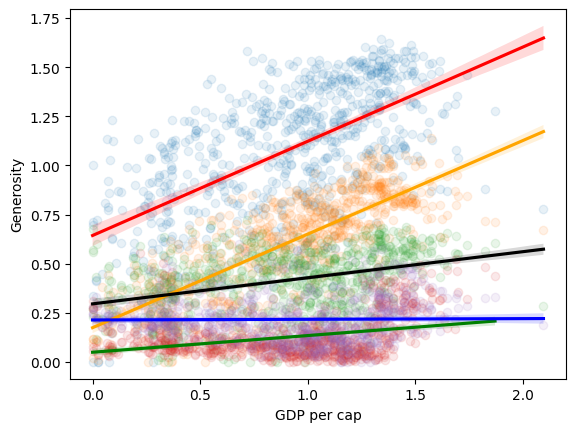

In [ ]:
# Visualise all linear relationships between happiness score contributors

fig =
sns.regplot(data=combined_df, x='GDP per cap', y='Family', scatter_kws={'alpha':0.1}, line_kws = {'color':'red'})
sns.regplot(data=combined_df, x='GDP per cap', y='Life Expectancy', scatter_kws={'alpha':0.1},line_kws = {'color':'orange'})
sns.regplot(data=combined_df, x='GDP per cap', y='Freedom', scatter_kws={'alpha':0.1},line_kws = {'color':'black'})
sns.regplot(data=combined_df, x='GDP per cap', y='Corruption', scatter_kws={'alpha':0.1},line_kws = {'color':'green'})
sns.regplot(data=combined_df, x='GDP per cap', y='Generosity', scatter_kws={'alpha':0.1},line_kws = {'color':'blue'},)
sns.set_axis_labels('Colors', 'Values')